# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv('marketing.csv')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,9/9/2013,16,520,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,8/5/2013,32,76,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,6/6/2013,19,14,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,0,0,20,1,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

In [4]:
## Checking the shape and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [6]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [7]:
df.isnull().sum()/len(df)*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
(df[df.duplicated()])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


### 5. Drop the columns which you think redundant for the analysis 

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df=df.drop(columns=['ID','Dt_Customer'],axis=1)

In [11]:
## Checking the shape and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [12]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [13]:
df['Marital_Status']=df['Marital_Status'].replace(['Married','Together'],'Relationship')

In [14]:
df['Marital_Status'].unique()

array(['Single', 'Relationship', 'Divorced', 'Widow', 'Alone', 'Absurd',
       'YOLO'], dtype=object)

In [15]:
df['Marital_Status']=df['Marital_Status'].replace(['Divorced','Widow','Alone','YOLO','Absurd'],'Relationship')

In [16]:
df['Marital_Status'].unique()

array(['Single', 'Relationship'], dtype=object)

In [17]:
df['Marital_Status'].value_counts()

Relationship    1760
Single           480
Name: Marital_Status, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [18]:
df['Total_Expenses']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [19]:
df['Total_Expenses']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2240, dtype: int64

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [20]:
df['Num_Total_Purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases']

In [21]:
df['Num_Total_Purchases']

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2240, dtype: int64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [22]:
df['Kids']=df['Kidhome']+df['Teenhome']

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [23]:
df['TotalAcceptedCmp']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

### 11. Drop those columns which we have used above for obtaining new features

In [24]:
df=df.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebPurchases','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],axis=1)

In [25]:
## Checking the shape and info
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Recency              2240 non-null   int64  
 5   NumWebVisitsMonth    2240 non-null   int64  
 6   Complain             2240 non-null   int64  
 7   Total_Expenses       2240 non-null   int64  
 8   Num_Total_Purchases  2240 non-null   int64  
 9   Kids                 2240 non-null   int64  
 10  TotalAcceptedCmp     2240 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 192.6+ KB


(2240, 11)

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [26]:
df['Age']=2022-df['Year_Birth']

In [27]:
df=df.drop(columns=['Year_Birth'],axis=1)

In [28]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth',
       'Complain', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
       'TotalAcceptedCmp', 'Age'],
      dtype='object')

In [29]:
dfc=df.copy()

### 13. Encode the categorical variables in the dataset

In [30]:
df.describe(include='O')

,Education,Marital_Status
count,2240,2240
unique,5,2
top,Graduation,Relationship
freq,1127,1760


In [31]:
## Label Encoding
df_cat = df.select_dtypes(include='object')
le = LabelEncoder()
for col in df_cat:
    df[col] = le.fit_transform(df[col])

In [32]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,1,58138.0,58,7,0,1617,25,0,1,65
1,2,1,46344.0,38,5,0,27,6,2,0,68
2,2,0,71613.0,26,4,0,776,21,0,0,57
3,2,0,26646.0,26,6,0,53,8,1,0,38
4,4,0,58293.0,94,5,0,422,19,1,0,41


### 14. Standardize the columns, so that values are in a particular range

In [33]:
## Standardization
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [34]:
scaled_features_df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,1.914854,0.235327,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,1.914854,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,-0.522233,0.773633,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,-0.522233,-1.022732,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,-0.522233,0.241519,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [35]:
## Calculating covariance matrix
cov_matrix = np.cov(scaled_features_df.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00044663e+00 -9.67920598e-03  1.20027297e-01 -1.17336854e-02
  -4.02988173e-02 -5.05625191e-02  9.20951775e-02  9.40543885e-02
   5.32130438e-02  6.32789156e-02  1.71466853e-01]
 [-9.67920598e-03  1.00044663e+00 -2.56394511e-02  7.16099838e-03
  -7.14635380e-03  1.69421277e-02  5.94490499e-04 -4.20877415e-02
  -5.53395635e-02  3.60645797e-02 -1.17030141e-01]
 [ 1.20027297e-01 -2.56394511e-02  1.00044663e+00 -3.94826239e-03
  -5.50069657e-01 -2.72352757e-02  6.65003374e-01  5.63621397e-01
  -2.90841549e-01  2.87174434e-01  1.61013782e-01]
 [-1.17336854e-02  7.16099838e-03 -3.94826239e-03  1.00044663e+00
  -2.14542684e-02  1.32369878e-02  2.04417334e-02  5.74294350e-03
   1.80614498e-02 -8.90020337e-02  1.98799637e-02]
 [-4.02988173e-02 -7.14635380e-03 -5.50069657e-01 -2.14542684e-02
   1.00044663e+00  1.97773363e-02 -5.00441309e-01 -3.12427954e-01
   4.18606158e-01 -1.28367257e-01 -1.21193363e-01]
 [-5.05625191e-02  1.69421277e-02 -2.72352757e-02  1.32369878e-02

In [36]:
## Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[ 8.10846157e-02 -1.26580008e-02 -2.39141020e-02 -4.65847687e-01
  -9.05835502e-02  1.43135848e-01 -6.08331734e-01  3.66511521e-01
   4.67633872e-01 -1.54445052e-01 -7.27674282e-03]
 [-5.61831292e-03 -6.85601446e-03  8.41094362e-03  3.79467705e-01
  -2.68516044e-02 -2.24252489e-02  3.69997423e-01  5.41529035e-02
   7.99716010e-01 -7.31953393e-02  2.64380713e-01]
 [ 4.54136788e-01 -1.10465490e-01  7.33549966e-01 -1.04783502e-01
   3.99447573e-01  2.33175835e-01  7.55475060e-02 -5.58131156e-02
   2.20187976e-04 -2.22440656e-03  9.86162227e-02]
 [-4.89299283e-03 -3.73341808e-02  1.74862864e-02 -8.69292147e-02
   5.06902556e-02 -1.31476105e-01 -8.94753581e-02 -6.98925058e-01
   2.44064063e-01 -4.36477721e-01 -4.73584361e-01]
 [-3.78757634e-01  9.87195248e-02  5.23541501e-01 -3.99301576e-02
  -4.48347634e-01  8.65702925e-02  2.14540554e-01  2.38793462e-01
   5.65870986e-02  9.20597946e-02 -4.97865343e-01]
 [-2.91609607e-02  6.25538381e-03  2.70902063e-03 -7.88373876e-03
  

In [37]:
## Calculating the Variance explained and the cummulative variance explained
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [28.985775199856988, 11.863553769484477, 9.722943057801793, 9.127635525696247, 9.000330755046058, 7.9845839939178225, 7.178858953220154, 6.436456091077675, 5.2206436940737735, 3.034933021662558, 1.4442859381624498]
Cummulative Variance Explained:  [ 28.9857752   40.84932897  50.57227203  59.69990755  68.70023831
  76.6848223   83.86368126  90.30013735  95.52078104  98.55571406
 100.        ]


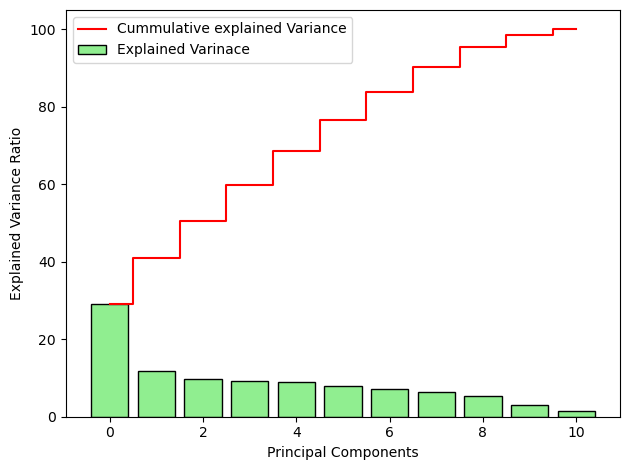

In [38]:
## Scree plot
plt.bar(range(11),var_exp, align='center',color='lightgreen',edgecolor='black',label='Explained Varinace')
plt.step(range(11), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [39]:
## Fitting the PCA model
pca=PCA(n_components = 9)
pca.fit(scaled_features_df)

PCA(n_components=9)

In [40]:
data_pca = pca.transform(scaled_features_df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.923928,-0.676567,-0.009004,-0.002127,1.437427,0.363522,1.504078,-0.643323,-1.644130
1,-1.545026,0.357125,-0.090594,0.058002,1.417630,-1.429141,1.458276,-0.679390,0.895268
2,1.330256,-0.086195,0.054166,0.218719,-0.988987,-0.959562,-0.036147,0.154607,-0.718654
3,-1.740621,-0.914155,-0.480602,0.096361,-0.890208,-0.294064,-0.681012,0.391946,0.033074
4,0.078899,0.569762,0.711916,-1.140131,0.496661,0.818476,-1.376511,1.110813,0.013388


In [41]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, random_state=100)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,23536.320448
1,2,18132.126083
2,3,16649.683546
3,4,14625.680933
4,5,13338.375173
5,6,12229.526642
6,7,11451.940462
7,8,10994.673768
8,9,10421.680089
9,10,10064.530500


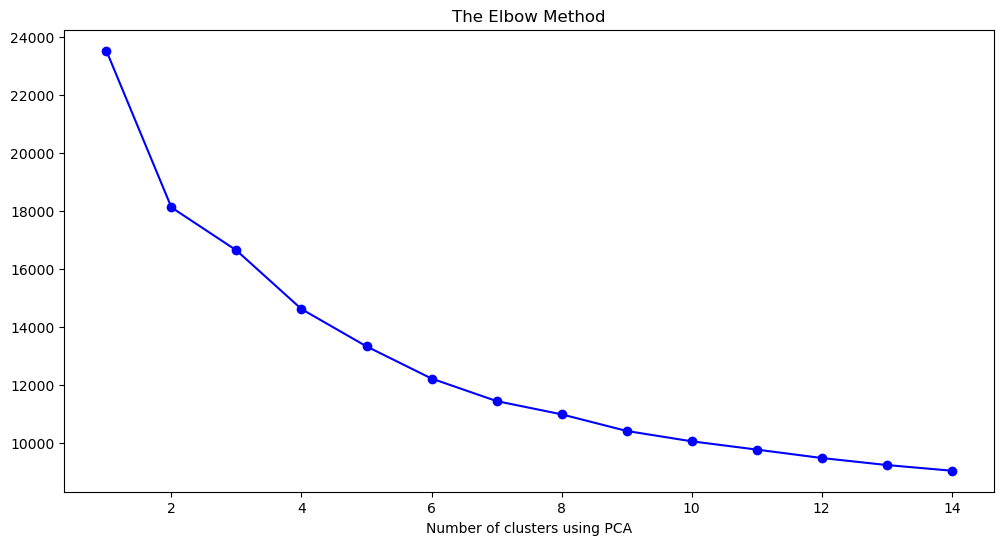

In [42]:
## Elbow method
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [43]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(data_pca)

KMeans(n_clusters=3, random_state=100)

In [44]:
## Creating a new dataframe only for labels.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels.head(5)

,Labels
0,1
1,0
2,2
3,0
4,2


In [45]:
## Joining the label dataframe to the data_pca dataframe
kmeans_df = data_pca.join(df_labels)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Labels
0,1.923928,-0.676567,-0.009004,-0.002127,1.437427,0.363522,1.504078,-0.643323,-1.644130,1
1,-1.545026,0.357125,-0.090594,0.058002,1.417630,-1.429141,1.458276,-0.679390,0.895268,0
2,1.330256,-0.086195,0.054166,0.218719,-0.988987,-0.959562,-0.036147,0.154607,-0.718654,2
3,-1.740621,-0.914155,-0.480602,0.096361,-0.890208,-0.294064,-0.681012,0.391946,0.033074,0
4,0.078899,0.569762,0.711916,-1.140131,0.496661,0.818476,-1.376511,1.110813,0.013388,2


In [46]:
kmeans_df['Labels'].value_counts()

0    1012
2     717
1     511
Name: Labels, dtype: int64

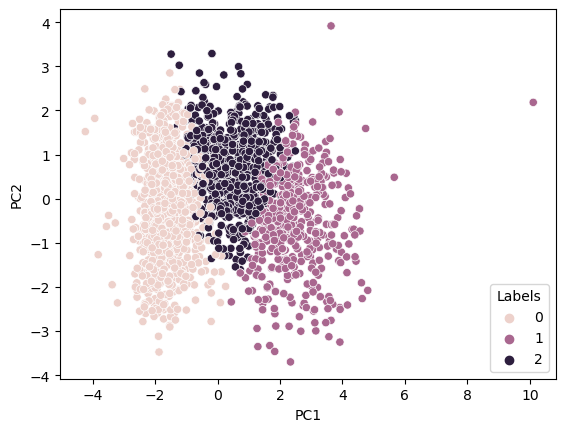

In [47]:
## Visualizing the clusters formed
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue='Labels',data=kmeans_df)
plt.show()

In [48]:
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(data_pca)
    labels = kmeans.predict(data_pca)
    print(i,silhouette_score(data_pca,labels))

2 0.23240446468591935
3 0.1579105957009556
4 0.20033626077354003
5 0.17547996051451073
6 0.14308408742548595
7 0.1546250044187883
8 0.16136859371093074
9 0.15487675340508555
10 0.14929671688167304
11 0.1519392608158246
12 0.14422816903179636
13 0.14253523419971015
14 0.15122186240897323


- From above, we can observe that for 3 clusters the silhoutte score is highest, we can choose optimal clusters as 3.

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

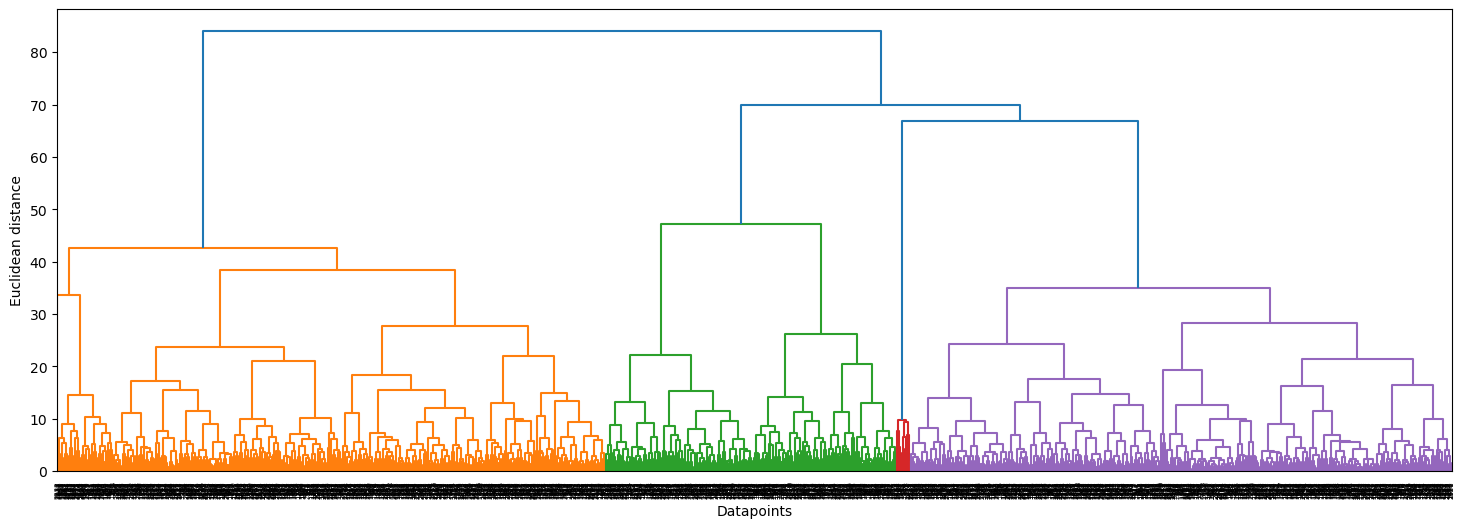

In [49]:
plt.figure(figsize=[18,6])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [50]:
from sklearn.metrics import silhouette_score

for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.15489149712418238
3 0.17592877764995915
4 0.18294938888487766
5 0.1586722166369534
6 0.16451765409563066
7 0.14168680354829943
8 0.10959402428376835
9 0.10951162687931217
10 0.10034851243600752
11 0.09258175844401684
12 0.09790806805230966
13 0.09457434020400292
14 0.09699288812712091


- From the observation of dendogram and silhouette scores, the highest silhouette score is for the cluster 4.
- Let's choose K=4 as the optimal cluster size and build agglomerative clustering model.

In [51]:
## Building Hierarchical clustering model using the optimal clustera as 4 using original data
hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [52]:
## Creating a dataframe of the Labels
df_label1=pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head()

,Labels
0,0
1,0
2,1
3,2
4,1


In [53]:
## Joining the label dataframe to the Original dataframe before standardization
df_hier = dfc.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,65,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,68,0
2,Graduation,Relationship,71613.0,26,4,0,776,21,0,0,57,1
3,Graduation,Relationship,26646.0,26,6,0,53,8,1,0,38,2
4,PhD,Relationship,58293.0,94,5,0,422,19,1,0,41,1


### Visualization and Interpretation of results

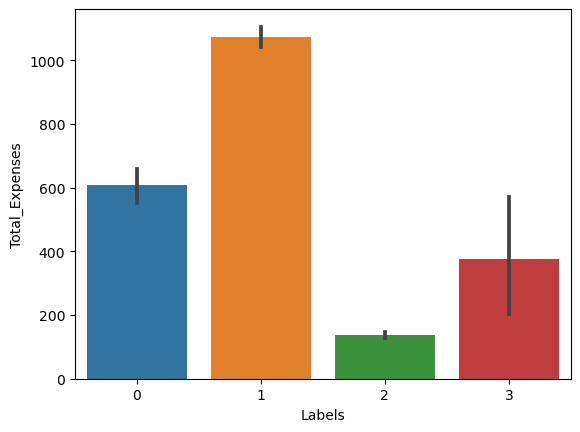

In [54]:
sns.barplot(df_hier['Labels'],df_hier['Total_Expenses'])
plt.show()

- The Total_Expenses is much higher for cluster 1 compared to the clusters 0,2 and 3

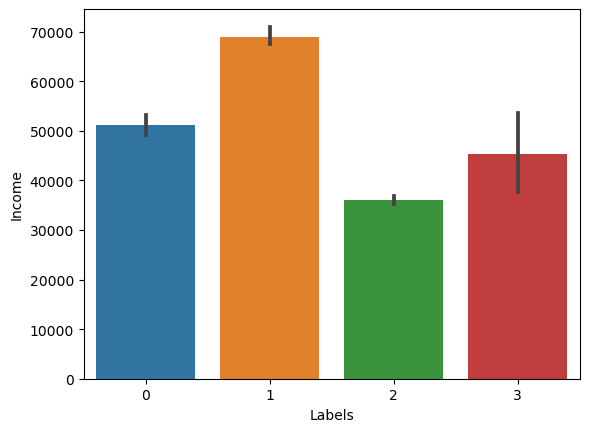

In [55]:
sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()

- Where as the Income is also higher for the cluster 1 followed by the cluster 0, 3 and 2

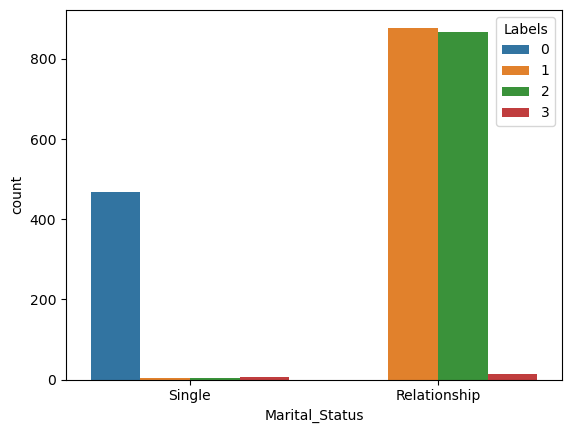

In [56]:
sns.countplot(df_hier['Marital_Status'], hue= 'Labels', data=df_hier)
plt.show()

- We can observe that the most of the customer who are in a relationship falls under cluster 1 and followed by cluster 2

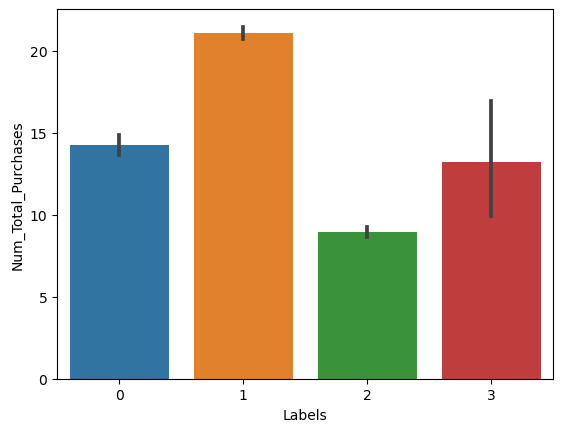

In [57]:
sns.barplot(df_hier['Labels'],df_hier['Num_Total_Purchases'])
plt.show()

- The Total number of purchases is also mucch higher for the customers from cluster 1 compared to cluster 0, 3 and 2.

### Conclusion

- We can conclude that the customers belong to cluster 1 does the maximum purchases, has spent maximum amount and have maximum income.
- Where customers belong to cluster 2 total expenses, lower Income and does minimum purchases compared to other three clusters.
- Customers belongs to cluster 0 and 3 does average purchases, has average income.

-----
## Happy Learning
-----